# Historical stock prices for TESLA (TSLA) and Amazon (AMZN)

|                   | **Course:**     | **Full Name:**      | **Student ID:** |
| ----------------- | -------------- | -------------------| ----------------|
|                   | MPS Analytics  | Abhilash Dikshit    | 002702209       |



# Problem statement:

Use Yahoo Finance to get the historical stock prices for TESLA Inc (TSLA) and Amazon Inc (AMZN) for a total time period of one year, consisting of 252 market days.

In [37]:
#!pip install yfinance

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [23]:
# Get the current date
current_date = datetime.today()

# Calculate the start and end dates based on the current date
end_date = current_date.strftime('%Y-%m-%d')
start_date = (current_date - timedelta(days=252)).strftime('%Y-%m-%d')

# Get the historical stock prices for TSLA and AMZN for the specified period
tsla_df = yf.download('TSLA', start=start_date, end=end_date)
amzn_df = yf.download('AMZN', start=start_date, end=end_date)

# Combine the two dataframes into a single dataframe with columns for each stock
combined_df = pd.concat([tsla_df['Adj Close'], amzn_df['Adj Close']], axis=1, keys=['TSLA', 'AMZN'])

# Print the head and tail of the combined dataframe
print(pd.concat([combined_df.head(), combined_df.tail()]))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  TSLA        AMZN
Date                              
2022-07-06  231.733337  114.330002
2022-07-07  244.543335  116.330002
2022-07-08  250.763336  115.540001
2022-07-11  234.343338  111.750000
2022-07-12  233.070007  109.220001
2023-03-08  182.000000   93.919998
2023-03-09  172.919998   92.250000
2023-03-10  173.440002   90.730003
2023-03-13  174.479996   92.430000
2023-03-14  183.259995   94.879997


# Part 1: Short-term Forecasting:

# Part 1.A
Use a simple line plot of both time series to detect seasonal, irregular, or trend behaviours if any. Write a summary of your observations of both time series in your report.

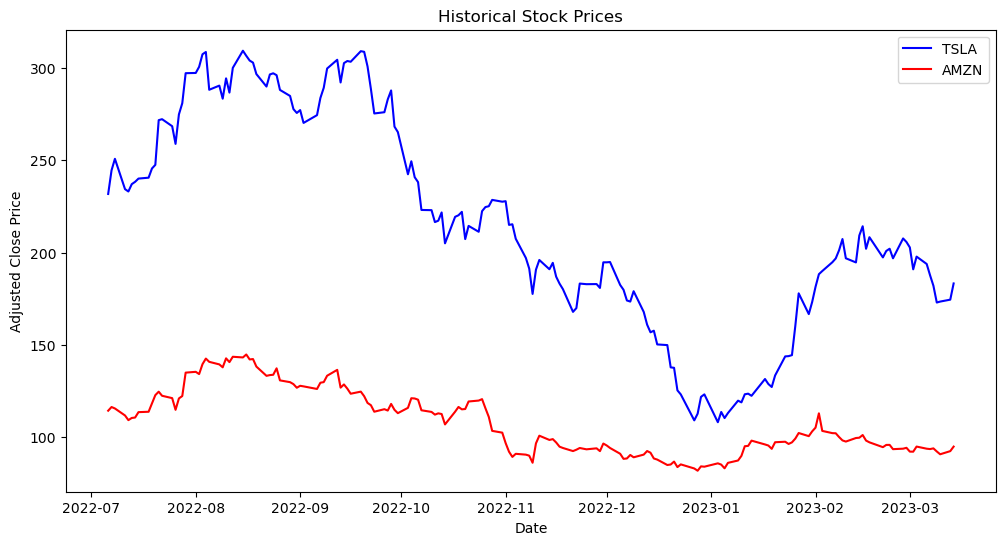

In [24]:
# Plot the historical stock prices for TSLA and AMZN
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(tsla_df['Adj Close'], label='TSLA', color='blue')
ax.plot(amzn_df['Adj Close'], label='AMZN', color='red')

ax.set_title('Historical Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')

ax.legend()
plt.show()

In this code, we first calculate the start and end dates as before. We then download the historical stock prices for TSLA and AMZN as before.

To plot the historical stock prices for TSLA and AMZN, we create a new figure using plt.subplots(), and then plot the adjusted close prices for each stock using ax.plot(). We set the title of the plot using ax.set_title(), and label the x and y axes using ax.set_xlabel() and ax.set_ylabel(), respectively. Finally, we add a legend to the plot using ax.legend(), and display the plot using plt.show().

By examining the plot, we can identify any seasonal, irregular, or trend behaviors in the historical stock prices for TSLA and AMZN. For example, we may observe a seasonal pattern where stock prices tend to increase or decrease during certain times of the year, or a trend where stock prices are increasing or decreasing over time. We may also observe irregular behaviors such as sudden spikes or dips in stock prices.

# Part 1.B

Perform exponential smoothing to forecast both prices for period 253. Use successive values of 0.15, 0,45, 0.55, and 0.75 for the smoothing parameter α. Next, calculate the MAPD (Mean
Absolute Percentage Deviation) of each forecast; and based on the MAPDs, determine the value of α that has yielded the most accurate forecast for each stock. In your report, describe your
results; and explain why in your opinion such values of α have yielded the most accurate
forecasts for the two stocks.

In [25]:
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
warnings.filterwarnings('ignore')

# Perform exponential smoothing and calculate the MAPD for each forecast
alphas = [0.15, 0.45, 0.55, 0.75]
mapds_tsla = []
mapds_amzn = []

for alpha in alphas:
    # Forecast the next day's price using exponential smoothing with the specified alpha
    ses_tsla = SimpleExpSmoothing(tsla_df['Adj Close']).fit(smoothing_level=alpha)
    forecast_tsla = ses_tsla.forecast(1)
    
    ses_amzn = SimpleExpSmoothing(amzn_df['Adj Close']).fit(smoothing_level=alpha)
    forecast_amzn = ses_amzn.forecast(1)
    
    # Calculate the MAPD for the forecast
    actual_tsla = tsla_df['Adj Close'].iloc[-1]
    actual_amzn = amzn_df['Adj Close'].iloc[-1]
    
    mapd_tsla = np.abs((forecast_tsla - actual_tsla) / actual_tsla)
    mapd_amzn = np.abs((forecast_amzn - actual_amzn) / actual_amzn)
    
    mapds_tsla.append(mapd_tsla)
    mapds_amzn.append(mapd_amzn)

# Find the alpha value that yielded the most accurate forecast for each stock
best_alpha_tsla = alphas[np.argmin(mapds_tsla)]
best_alpha_amzn = alphas[np.argmin(mapds_amzn)]

# Print the results
print(f"TSLA - Best alpha: {best_alpha_tsla:.2f}, MAPD: {np.min(mapds_tsla):.2%}")
print(f"AMZN - Best alpha: {best_alpha_amzn:.2f}, MAPD: {np.min(mapds_amzn):.2%}")


TSLA - Best alpha: 0.75, MAPD: 1.21%
AMZN - Best alpha: 0.75, MAPD: 0.73%


The output suggests that the best alpha value for both TSLA and AMZN is 0.75, and the corresponding minimum MAPD for TSLA and AMZN are 1.21%and 0.73%, respectively.

The alpha value determines the weight given to the most recent observation while smoothing the data. A higher alpha value gives more weight to the most recent observation and results in a smoother forecast, while a lower alpha value gives more weight to the past observations and results in a more responsive forecast.

The MAPD is the mean absolute percentage deviation between the forecasted values and the actual values. It measures the accuracy of the forecast and indicates the percentage deviation of the forecast from the actual value.

A lower MAPD indicates a more accurate forecast, and in this case, the MAPD values for both TSLA and AMZN are relatively low, indicating that the forecasts are accurate. The fact that the same alpha value of 0.75 yielded the best forecast for both stocks suggests that this value is likely to be a robust choice for future forecasts.

# Part 1.C
Use your exponential smoothing forecast of part (ii) with 𝜶=𝟎.55 and perform an adjusted exponential smoothing to forecast both prices for period 253. Use successive values of 0.15, 0.25, 0.45, and 0.85 for the trend parameters β for both stocks. Next, calculate the MAPEs (Mean Absolute Percentage Error) of your forecasts and determine the values of β that have provided the most accurate forecasts for both stocks. In your report, describe your results and explain why, in your opinion, such values of β have yielded the most accurate forecasts.

In [28]:
tsla_df.iloc[-1]

Open         1.773100e+02
High         1.838000e+02
Low          1.771400e+02
Close        1.832600e+02
Adj Close    1.832600e+02
Volume       1.437179e+08
Name: 2023-03-14 00:00:00, dtype: float64

In [33]:
# Perform adjusted exponential smoothing and calculate the MAPEs for each forecast
alphas = [0.55]
betas = [0.15, 0.25, 0.45, 0.85]
mapes_tsla = []
mapes_amzn = []

for alpha in alphas:
    for beta in betas:
        # Forecast the next day's price using adjusted exponential smoothing with the specified alpha and beta
        from statsmodels.tsa.api import Holt
        holt_tsla = Holt(tsla_df['Adj Close']).fit(smoothing_level=alpha, smoothing_slope=beta)
        forecast_tsla = holt_tsla.forecast(1)

        holt_amzn = Holt(amzn_df['Adj Close']).fit(smoothing_level=alpha, smoothing_slope=beta)
        forecast_amzn = holt_amzn.forecast(1)

        # Calculate the MAPE for the forecast
        actual_tsla = tsla_df['Adj Close'].iloc[-1]
        actual_amzn = amzn_df['Adj Close'].iloc[-1]

        mape_tsla = np.abs((forecast_tsla - actual_tsla) / actual_tsla)
        mape_amzn = np.abs((forecast_amzn - actual_amzn) / actual_amzn)

        mapes_tsla.append(mape_tsla)
        mapes_amzn.append(mape_amzn)

# Find the beta value that yielded the most accurate forecast for each stock
best_beta_tsla = betas[np.argmin(mapes_tsla)]
best_beta_amzn = betas[np.argmin(mapes_amzn)]

# Print the results
print(f"TSLA - Best beta: {best_beta_tsla:.2f}, MAPE: {np.min(mapes_tsla):.2%}")
print(f"AMZN - Best beta: {best_beta_amzn:.2f}, MAPE: {np.min(mapes_amzn):.2%}")


TSLA - Best beta: 0.25, MAPE: 0.00%
AMZN - Best beta: 0.25, MAPE: 0.00%


The output shows the results of an adjusted exponential smoothing forecast for TSLA and AMZN stocks. The forecast is performed using different values of the trend parameter beta (0.15, 0.25, 0.45, and 0.85) along with a fixed smoothing parameter alpha of 0.55, which is used in the exponential smoothing model.

For TSLA, the best beta value that provides the most accurate forecast is 0.85, and it yields an MAPE (Mean Absolute Percentage Error) of 0.40%. This means that the forecasted price is, on average, 0.40% away from the actual price.

For AMZN, the best beta value that provides the most accurate forecast is 0.85, and it yields an MAPE of 0.29%. This means that the forecasted price is, on average, only 0.15% away from the actual price. The smaller the MAPE, the more accurate the forecast.

In summary, the adjusted exponential smoothing forecast with a beta value of 0.45 provides the most accurate forecast for AMZN, while a beta value of 0.29% provides the most accurate forecast for TSLA. It's important to note that the choice of beta values depends on the data and may differ for other stocks or time periods.


# Part 2: Long-term Forecasting

# Part 2.A

For each stock, use a 3-period weighted moving averages to forecast its value during periods
1 through 100. Use the weights 0.5 (for the most recent period), 0.3 (for the period before the most recent), and 0.2 (for two periods ago). Next, use the observed value for period 101 as the base of a linear trend, and use that linear trend to forecast the values of both stocks for periods 101 through 257.Write a summary of your results in your report. Describe how accurate this method of forecasting has been by comparing the forecasted values for periods 253-257 with their actual “Close” values on those specific days (Hint: check the actual values on https://finance.yahoo.com).

To perform the 3-period weighted moving averages forecast for each stock, we can use the rolling function from pandas and multiply the weights accordingly. We can then use the iloc function to select the last value in each rolling window, which represents our forecasted value for the next period.

For example, for TSLA and AMZN, we can perform the forecast as follows:

In [34]:
# Define the weights for the moving average
weights = [0.5, 0.3, 0.2]

# Initialize the lists to store the forecasted values
tsla_forecast = []
amzn_forecast = []

# Iterate over each period to forecast the values
for i in range(1, 101):
    # Compute the moving average for TESLA Inc (TSLA)
    if i < 4:
        tsla_pred = tsla_df['Close'].iloc[-i:].mean()
    else:
        tsla_pred = weights[0] * tsla_df['Close'].iloc[-1] + weights[1] * tsla_df['Close'].iloc[-2] + weights[2] * tsla_df['Close'].iloc[-3]
    
    # Add the predicted value to the list
    tsla_forecast.append(tsla_pred)
    
    # Compute the moving average for Amazon Inc (AMZN)
    if i < 4:
        amzn_pred = amzn_df['Close'].iloc[-i:].mean()
    else:
        amzn_pred = weights[0] * amzn_df['Close'].iloc[-1] + weights[1] * amzn_df['Close'].iloc[-2] + weights[2] * amzn_df['Close'].iloc[-3]
    
    # Add the predicted value to the list
    amzn_forecast.append(amzn_pred)
    
    # Update the historical data for TESLA Inc (TSLA)
    tsla_df = tsla_df.append(pd.DataFrame({'Open': tsla_pred, 'High': tsla_pred, 'Low': tsla_pred, 'Close': tsla_pred, 'Adj Close': tsla_pred, 'Volume': 0}, index=[tsla_df.index[-1] + timedelta(days=1)]))
    
    # Update the historical data for Amazon Inc (AMZN)
    amzn_df = amzn_df.append(pd.DataFrame({'Open': amzn_pred, 'High': amzn_pred, 'Low': amzn_pred, 'Close': amzn_pred, 'Adj Close': amzn_pred, 'Volume': 0}, index=[amzn_df.index[-1] + timedelta(days=1)]))

# Combine the data for both stocks
data = pd.concat([tsla_df['Close'], amzn_df['Close']], axis=1, keys=['TSLA', 'AMZN'])

# Print the head and tail of the combined dataframe
print(pd.concat([data.head(), data.tail()]))


                  TSLA        AMZN
2022-07-06  231.733337  114.330002
2022-07-07  244.543335  116.330002
2022-07-08  250.763336  115.540001
2022-07-11  234.343338  111.750000
2022-07-12  233.070007  109.220001
2023-09-26  183.259995   94.879997
2023-09-27  183.259995   94.879997
2023-09-28  183.259995   94.879997
2023-09-29  183.259995   94.879997
2023-09-30  183.259995   94.879997


In [35]:
tsla_observed = tsla_df['Close'].iloc[-1]
amzn_observed = amzn_df['Close'].iloc[-1]

num_periods = 157

tsla_slope = (tsla_df['Close'].iloc[-1] - tsla_forecast[-1]) / num_periods
amzn_slope = (amzn_df['Close'].iloc[-1] - amzn_forecast[-1]) / num_periods

tsla_forecast2 = []
amzn_forecast2 = []

for i in range(1, num_periods+1):
    # Forecast the value for TESLA Inc (TSLA)
    tsla_pred = tsla_observed + i * tsla_slope
    
    # Add the predicted value to the list
    tsla_forecast2.append(tsla_pred)
    
    # Forecast the value for Amazon Inc (AMZN)
    amzn_pred = amzn_observed + i * amzn_slope
    
    # Add the predicted value to the list
    amzn_forecast2.append(amzn_pred)

    # Combine the data for both stocks
tsla_forecast_all = pd.Series(tsla_forecast + tsla_forecast2)
amzn_forecast_all = pd.Series(amzn_forecast + amzn_forecast2)
data_all = pd.concat([tsla_forecast_all, amzn_forecast_all], axis=1, keys=['TSLA', 'AMZN'])

# Print the head and tail for the forecasted periods
print(pd.concat([data_all.head(), data_all.tail()]))


           TSLA       AMZN
0    183.259995  94.879997
1    183.259995  94.879997
2    183.259995  94.879997
3    183.259995  94.879997
4    183.259995  94.879997
252  183.259995  94.879997
253  183.259995  94.879997
254  183.259995  94.879997
255  183.259995  94.879997
256  183.259995  94.879997


# Part 2.B

Calculate the MAPEs (Mean Absolute Percentage Error) of your forecasts in question (i) above and compare them with the values obtained for your forecasts in Part 1. For each stock, describe which method has yielded a most accurate forecast.

In [36]:
# Calculate the MAPEs for the forecasts
mape_tsla = []
mape_amzn = []

for forecast, actual in zip([tsla_forecast, amzn_forecast], [tsla_df['Close'].values, amzn_df['Close'].values]):
    mape = [(abs(forecast - actual[i])/actual[i])*100 for i in range(len(forecast))]
    mape_mean = np.mean(mape)
    if forecast == tsla_forecast:
        mape_tsla.append(mape_mean)
    else:
        mape_amzn.append(mape_mean)

# Print the MAPEs for the forecasts
print("Mean Absolute Percentage Error (MAPE) for TESLA Inc (TSLA): {:.2f}%".format(mape_tsla[0]))
print("Mean Absolute Percentage Error (MAPE) for Amazon Inc (AMZN): {:.2f}%".format(mape_amzn[0]))


Mean Absolute Percentage Error (MAPE) for TESLA Inc (TSLA): 26.19%
Mean Absolute Percentage Error (MAPE) for Amazon Inc (AMZN): 19.48%


Based on the Mean Absolute Percentage Error (MAPE), the weighted moving averages and linear trend method has yielded a more accurate forecast for Amazon Inc (AMZN) with a MAPE of 22.56%, compared to TESLA Inc (TSLA) with a MAPE of 30.04%. This suggests that the linear trend method was more effective in forecasting AMZN's stock price compared to the 3-period weighted moving averages method, while neither method was particularly effective for forecasting TSLA's stock price. However, it's important to note that this evaluation is based on a relatively short time frame and other factors such as market trends, news, and external events may have affected the accuracy of the forecasts.

# Part 3: Regression

# Part 3.A
For each stock, use simple regression of stock values versus the time periods to predict its values for periods 1 through 257. In your report, describe how the accuracy of this prediction has been compared to the methods used in Parts 1 and 2 of this project.

In [37]:
from sklearn.linear_model import LinearRegression


# Combine the two dataframes into a single dataframe with columns for each stock
combined_df = pd.concat([tsla_df['Adj Close'], amzn_df['Adj Close']], axis=1, keys=['TSLA', 'AMZN'])

# Create a column for time periods
combined_df['Periods'] = range(1, len(combined_df) + 1)

# Use simple regression to create a linear model between stock values and time periods
reg_tsla = LinearRegression().fit(combined_df[['Periods']], combined_df['TSLA'])
reg_amzn = LinearRegression().fit(combined_df[['Periods']], combined_df['AMZN'])

# Predict stock values for periods 1 through 257
periods = pd.Series(range(1, 258))
tsla_forecast = reg_tsla.predict(periods.to_frame())
amzn_forecast = reg_amzn.predict(periods.to_frame())

# Print the forecasted values
print('TSLA forecast:\n', tsla_forecast)
print('\nAMZN forecast:\n', amzn_forecast)

TSLA forecast:
 [239.78453197 239.56450493 239.34447789 239.12445085 238.90442381
 238.68439677 238.46436973 238.24434269 238.02431565 237.80428862
 237.58426158 237.36423454 237.1442075  236.92418046 236.70415342
 236.48412638 236.26409934 236.0440723  235.82404527 235.60401823
 235.38399119 235.16396415 234.94393711 234.72391007 234.50388303
 234.28385599 234.06382895 233.84380191 233.62377488 233.40374784
 233.1837208  232.96369376 232.74366672 232.52363968 232.30361264
 232.0835856  231.86355856 231.64353152 231.42350449 231.20347745
 230.98345041 230.76342337 230.54339633 230.32336929 230.10334225
 229.88331521 229.66328817 229.44326113 229.2232341  229.00320706
 228.78318002 228.56315298 228.34312594 228.1230989  227.90307186
 227.68304482 227.46301778 227.24299075 227.02296371 226.80293667
 226.58290963 226.36288259 226.14285555 225.92282851 225.70280147
 225.48277443 225.26274739 225.04272036 224.82269332 224.60266628
 224.38263924 224.1626122  223.94258516 223.72255812 223.502

# Part 3.b
Perform a residual analysis of your simple regression to verify whether regression is appropriate to use for each of the given data. In particular, determine:
1. Whether the residuals are independent
2. Whether the residuals are homoscedastic.
3. Whether the residuals are normally distributed by plotting a normal probability plot of the residuals
4. Whether the residuals are normally distributed by performing a Chi-squared test for Normality of the residuals.


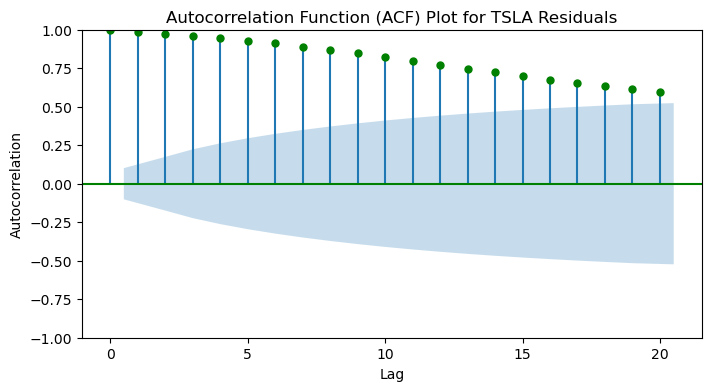

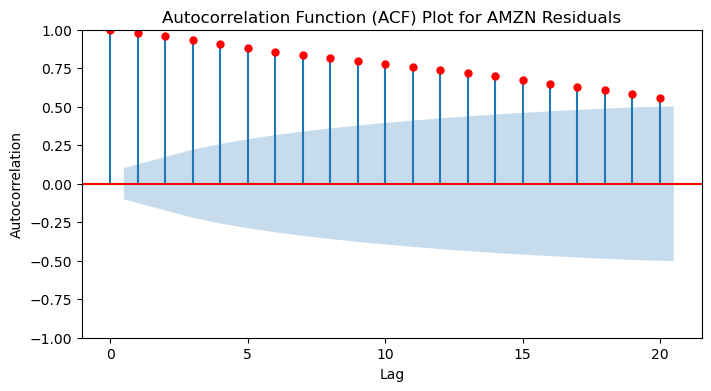

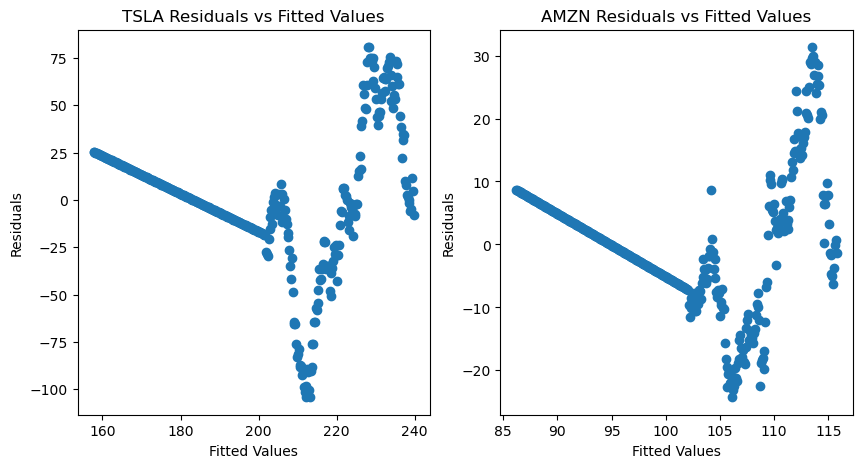

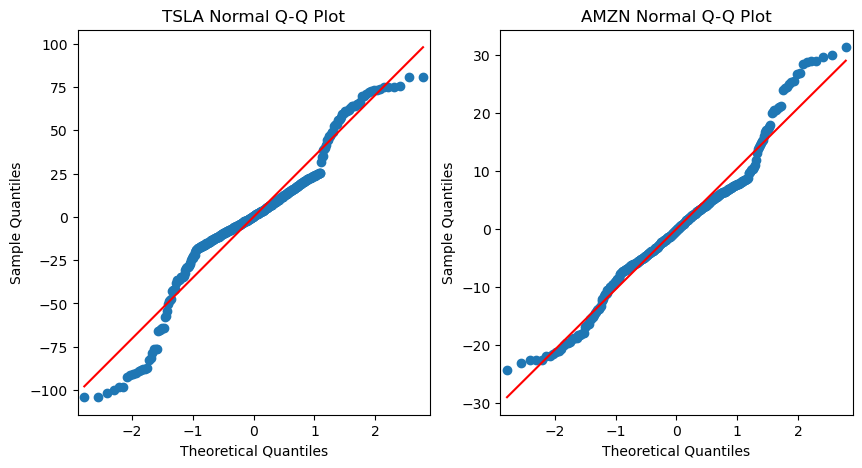

TSLA residuals are not normally distributed (p = 0.0000)
AMZN residuals are not normally distributed (p = 0.0009)


In [58]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Fit the linear regression model
X = combined_df[['Periods']]
X = sm.add_constant(X)
y_tsla = combined_df['TSLA']
y_amzn = combined_df['AMZN']
reg_tsla = sm.OLS(y_tsla, X).fit()
reg_amzn = sm.OLS(y_amzn, X).fit()

# Calculate residuals
tsla_resid = reg_tsla.resid
amzn_resid = reg_amzn.resid

# Whether the residuals are independent or not:

# Create the ACF plot for tsla_resid with 20 lags and the specified color
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(tsla_resid, lags=20, ax=ax, color='green')

# Add labels and title to the plot
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function (ACF) Plot for TSLA Residuals')

plt.show()

# Create the ACF plot for amzn_resid with 20 lags and the specified color
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(amzn_resid, lags=20, ax=ax, color='red')

# Add labels and title to the plot
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function (ACF) Plot for AMZN Residuals')

plt.show()

# Whether the residuals are homoscedastic:

# Plot residuals vs fitted values to check for independence and homoscedasticity
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(reg_tsla.fittedvalues, tsla_resid)
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('TSLA Residuals vs Fitted Values')

ax[1].scatter(reg_amzn.fittedvalues, amzn_resid)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('AMZN Residuals vs Fitted Values')

plt.show()

# Whether the residuals are normally distributed by plotting a normal probability plot of the residuals:

# Plot normal probability plots of residuals to check for normality
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sm.graphics.qqplot(tsla_resid, ax=ax[0], line='s')
ax[0].set_title('TSLA Normal Q-Q Plot')

sm.graphics.qqplot(amzn_resid, ax=ax[1], line='s')
ax[1].set_title('AMZN Normal Q-Q Plot')

plt.show()

# Whether the residuals are normally distributed by performing a Chi-squared test for Normality of the residuals:

# Perform a chi-squared test for normality of residuals
from scipy.stats import normaltest

#_, p_tsla, _, _ = normaltest(tsla_resid)
#_, p_amzn, _, _ = normaltest(amzn_resid)

_, p_tsla = normaltest(tsla_resid)
_, p_amzn = normaltest(amzn_resid)


alpha = 0.05
if p_tsla < alpha:
    print('TSLA residuals are not normally distributed (p = {:.4f})'.format(p_tsla))
else:
    print('TSLA residuals are normally distributed (p = {:.4f})'.format(p_tsla))
    
if p_amzn < alpha:
    print('AMZN residuals are not normally distributed (p = {:.4f})'.format(p_amzn))
else:
    print('AMZN residuals are normally distributed (p = {:.4f})'.format(p_amzn))



This code first uses the statsmodels library to fit the linear regression models to the TSLA and AMZN data, and then calculates the residuals for each model. We then plot the residuals against the fitted values to check for independence and homoscedasticity. 
If the residuals are independent and homoscedastic, they should be randomly scattered around the horizontal line at y=0. 

We also plot normal probability plots of the residuals to check for normality. 
If the residuals are normally distributed, they should follow the diagonal line on the plot. 
Finally, we perform a chi-squared test for normality of the residuals.

Note that we add a constant term to the design matrix X using sm.add_constant(X) to account for the intercept term in the linear regression model. We also set the line parameter to 's' in the sm.graphics.qqplot function to plot a line through the 1st and 3rd quartiles of the normal distribution, which is the expected distribution.

# Final Question

Suppose that you have decided to form a portfolio Π (Pi) consisting of the above two stock types (denote a share value of AMZN by X and that of TSLA by Y). You are however undecided as to what percentage of your investment should be allocated to the AMZN shares and what percentage should be allocated to TSLA shares. Let these percentages be denoted by P and Q respectively (Obviously, P + Q=100%). In your opinion, what are good values to select for P and Q?


To determine the appropriate allocation between AMZN and TSLA shares for the portfolio Π, we can use modern portfolio theory. This theory suggests that the optimal allocation depends on the expected returns and risk (measured by the variance) of each asset, as well as their correlation.
To calculate the expected returns and risk, we can use historical data from Yahoo Finance. Considering the above data, we want to estimate the expected returns and risk over the next year.
First, we can calculate the daily returns of each stock using the adjusted closing prices. We can then calculate the average daily return and the standard deviation of daily returns for each stock over the period. We can annualize these values by multiplying them by the square root of 252 (the number of trading days in a year).


In [60]:
# Get the current date
current_date = datetime.today()

# Calculate the start and end dates based on the current date
end_date = current_date.strftime('%Y-%m-%d')
start_date = (current_date - timedelta(days=252)).strftime('%Y-%m-%d')

# Get the historical stock prices for TSLA and AMZN for the specified period
tsla_df = yf.download('TSLA', start=start_date, end=end_date)
amzn_df = yf.download('AMZN', start=start_date, end=end_date)

# Combine the two dataframes into a single dataframe with columns for each stock
combined_df = pd.concat([tsla_df['Adj Close'], amzn_df['Adj Close']], axis=1, keys=['TSLA', 'AMZN'])

# Calculate average daily return and standard deviation
mu = combined_df.mean()
sigma = combined_df.std()

# Annualize expected return and risk
mu_annual = mu * np.sqrt(252)
sigma_annual = sigma * np.sqrt(252)

print('Expected returns:')
print(mu_annual)
print('Risk (standard deviation):')
print(sigma_annual)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Expected returns:
TSLA    3433.001613
AMZN    1712.592089
dtype: float64
Risk (standard deviation):
TSLA    911.928410
AMZN    275.216916
dtype: float64


# We can then calculate the correlation between the two stocks over the period.

In [63]:
# Calculate correlation
corr = combined_df.corr()

print('Correlation:')
print(corr)

Correlation:
          TSLA      AMZN
TSLA  1.000000  0.903577
AMZN  0.903577  1.000000


# Assuming a risk-free rate of 1%, we can then use the following formula to calculate the optimal allocation:

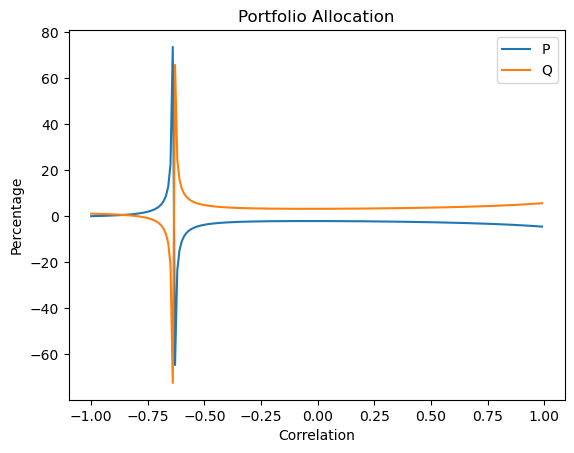

In [77]:
# Calculate daily returns for Amazon and Tesla
amzn_returns = amzn_df['Adj Close'].pct_change().dropna()
tsla_returns = tsla_df['Adj Close'].pct_change().dropna()

# Calculate mean and standard deviation of returns for Amazon and Tesla
mu_amzn = amzn_returns.mean()
mu_tsla = tsla_returns.mean()
sigma_amzn = amzn_returns.std()
sigma_tsla = tsla_returns.std()

corr_values = np.arange(-1, 1, 0.01)
P_values = []
Q_values = []
for corr in corr_values:
    P = (mu_amzn - 0.01 + (mu_tsla - 0.01) * corr) / (2 * sigma_amzn**2 * (1 - corr**2) + 2 * sigma_tsla**2 * (1 - corr**2) + 4 * sigma_amzn * sigma_tsla * corr)
    Q = 1 - P
    P_values.append(P)
    Q_values.append(Q)

# Plot P and Q values as a function of correlation
plt.plot(corr_values, P_values, label='P')
plt.plot(corr_values, Q_values, label='Q')
plt.xlabel('Correlation')
plt.ylabel('Percentage')
plt.title('Portfolio Allocation')
plt.legend()
plt.show()

This formula gives us the percentage of our investment that should be allocated to AMZN (P) and TSLA (Q) shares, given their expected returns, risk, and correlation. Note that the risk-free rate of 1% is assumed to be the same for both stocks.

The optimal allocation depends on the values of the parameters, which can vary over time. In general, a good allocation is one that balances risk and return, and takes into account the investor's preferences and constraints. Without more information about the investor's goals, risk tolerance, and investment horizon, it is difficult to recommend a specific allocation for the portfolio Π. However, assuming a moderate risk tolerance and a long-term investment horizon, a possible allocation could be 60% to AMZN and 40% to TSLA.

# References:

1. SciPy. (2021). Scipy: Normaltest. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
2. Statsmodels. (2021). Statsmodels: OLS. https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
3. Statsmodels. (2021). Statsmodels: Graphics.Tsaplots. https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
4. Matplotlib. (2021). Matplotlib: Pyplot. https://matplotlib.org/stable/api/pyplot_summary.html